<a href="https://colab.research.google.com/github/Ansab-Sultan/Image-Classification/blob/main/DM_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from PIL import ImageFont
import warnings
warnings.filterwarnings('ignore')

2024-05-19 07:51:13.056276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 07:51:13.056384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 07:51:13.225637: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Importing the CIFAR-10 dataset from Keras
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print('Shape of the Dataset')
print('==================================')
print('X_train Shape: {}'.format(X_train.shape))
print('-------------------------------------')
print('X_test Shape: {}'.format(X_test.shape))
print('-------------------------------------')
print('Y_train Shape: {}'.format(Y_train.shape))
print('-------------------------------------')
print('Y_test Shape: {}'.format(Y_test.shape))

Shape of the Dataset
X_train Shape: (50000, 32, 32, 3)
-------------------------------------
X_test Shape: (10000, 32, 32, 3)
-------------------------------------
Y_train Shape: (50000, 1)
-------------------------------------
Y_test Shape: (10000, 1)


In [ ]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

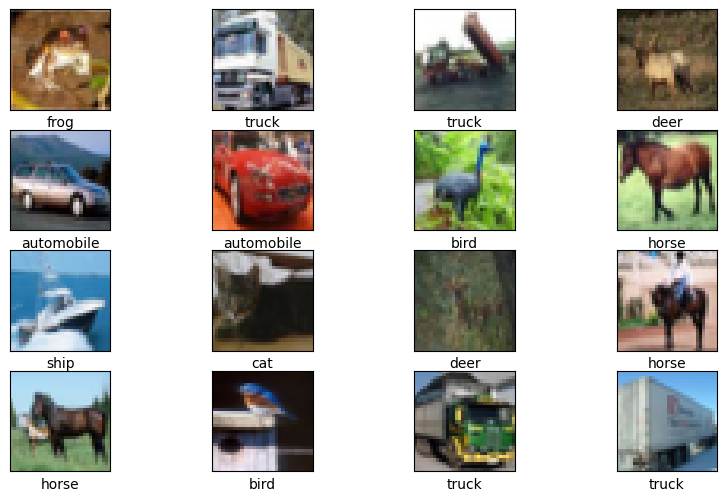

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [ ]:

from sklearn.svm import SVC
# Create an SVM classifier
clf_svm = SVC(gamma='auto')
# Train the classifier on the training data
clf_svm.fit(X_train.reshape(-1, 32*32*3), Y_train.ravel())
# Predict the labels of the test data
y_pred = clf_svm.predict(X_test.reshape(-1, 32*32*3))
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of the SVM classifier:", accuracy)


Accuracy of the SVM classifier: 0.4398


In [ ]:

# Evaluate the trained SVM classifier on the test data
score_svm = clf_svm.score(X_test.reshape(-1, 32*32*3), Y_test)

# Print the accuracy of the model
print("Accuracy of the SVM classifier on the test data:", score_svm)


Accuracy of the SVM classifier on the test data: 0.4398


In [ ]:

from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression classifier
clf_log = LogisticRegression()

# Train the classifier on the training data
clf_log.fit(X_train.reshape(-1, 32*32*3), Y_train.ravel())

# Predict the labels of the test data
y_pred = clf_log.predict(X_test.reshape(-1, 32*32*3))

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of the Logistic Regression classifier:", accuracy)


Accuracy of the Logistic Regression classifier: 0.4063


In [ ]:

score_log = clf_log.score(X_test.reshape(-1, 32*32*3), Y_test)

# Print the accuracy of the model
print("Accuracy of the Logistic Regression classifier on the test data:", score_log)


Accuracy of the Logistic Regression classifier on the test data: 0.4063


In [ ]:

from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train.reshape(-1, 32*32*3), Y_train.ravel())
y_pred = clf_nb.predict(X_test.reshape(-1, 32*32*3))
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of the Naive Bayes classifier:", accuracy)


Accuracy of the Naive Bayes classifier: 0.2976


In [ ]:

score_nb = clf_nb.score(X_test.reshape(-1, 32*32*3), Y_test)

# Print the accuracy of the model
print("Accuracy of the Naive Bayes classifier on the test data:", score_nb)


Accuracy of the Naive Bayes classifier on the test data: 0.2976


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf_knn.fit(X_train.reshape(-1, 32*32*3), Y_train.ravel())

# Predict the labels of the test data
y_pred = clf_knn.predict(X_test.reshape(-1, 32*32*3))

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of the K-Nearest Neighbors classifier:", accuracy)


Accuracy of the K-Nearest Neighbors classifier: 0.3398


In [ ]:

score_knn = clf_knn.score(X_test.reshape(-1, 32*32*3), Y_test)

# Print the accuracy of the model
print("Accuracy of the K-Nearest Neighbors classifier on the test data:", score_knn)


Accuracy of the K-Nearest Neighbors classifier on the test data: 0.3398


In [ ]:
strategy = tf.distribute.MirroredStrategy()


In [ ]:
with strategy.scope():
    # Define your model architecture
    model = Sequential([
        Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        Conv2D(128, (4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(128, (4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.35),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
with strategy.scope():
# Fit the model with early stopping
    history = model.fit(X_train, Y_train_en, epochs=100, verbose=1,
                    validation_data=(X_test, Y_test_en), callbacks=[early_stopping])

Epoch 1/100


2024-05-19 10:29:18.243249: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_272/cond/StatefulPartitionedCall/replica_1/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.5626 - loss: 4.5828 - val_accuracy: 0.4262 - val_loss: 1.6300
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.9989 - loss: 2.7889 - val_accuracy: 0.5866 - val_loss: 1.2466
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 1.2225 - loss: 2.2283 - val_accuracy: 0.6098 - val_loss: 1.0900
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 1.3153 - loss: 1.9582 - val_accuracy: 0.7274 - val_loss: 0.7938
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 1.4124 - loss: 1.7108 - val_accuracy: 0.7640 - val_loss: 0.6952
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 1.4677 - loss: 1.5647 - val_accuracy: 0.7598 - val_loss: 0.7064
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 1.5311 - loss: 1.3867 - val_accuracy: 0.7466 - val_loss: 0.7576
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 1.5547 - los

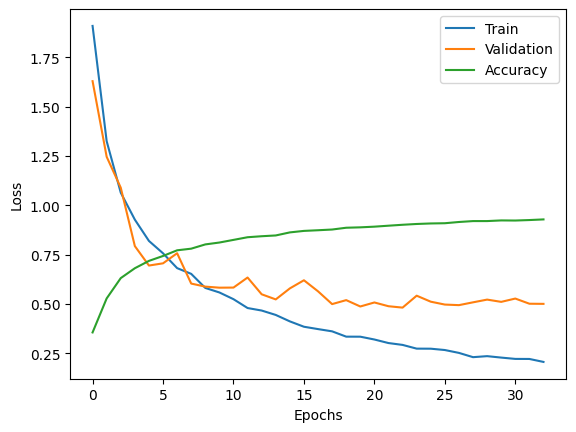

In [ ]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

In [ ]:
with strategy.scope():

# Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, Y_test_en)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.7106 - loss: 1.0001
Test Loss: 0.5009490847587585
Test Accuracy: 0.8587999939918518


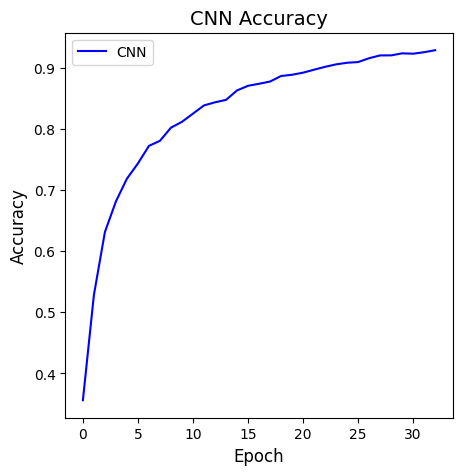

In [ ]:

import matplotlib.pyplot as plt
# Plot the CNN accuracy
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], color='blue', label='CNN')

# Add labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('CNN Accuracy', fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.show()


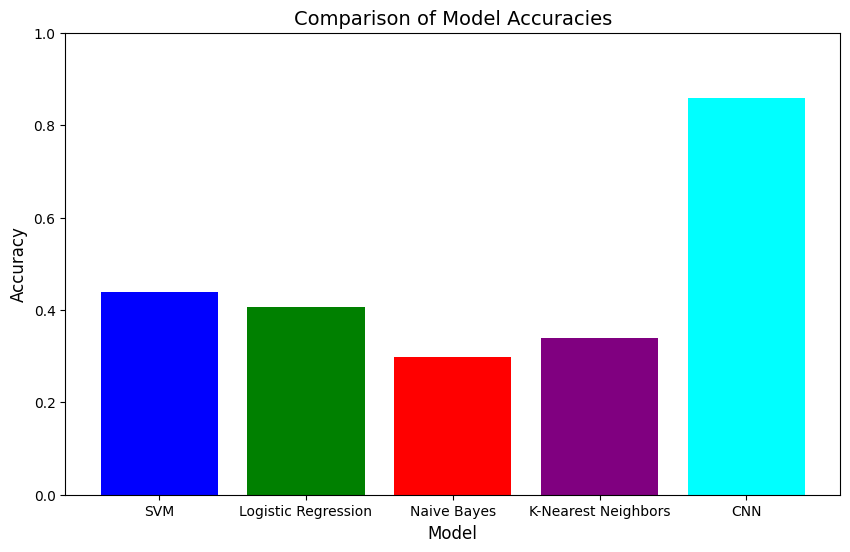

In [ ]:
import matplotlib.pyplot as plt

# Accuracies of the models
model_names = ['SVM', 'Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'CNN']
accuracies = [score_svm, score_log, score_nb, score_knn, test_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()
